In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#pd.options.mode.chained_assignment = None

In [250]:
#Reading merged business and review csv file.
restaurant = pd.read_csv("yelp_reviews_restaurants.csv")

In [251]:
#Exploratory Data Analysis

In [252]:
#Summary of restaurant.csv
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25213 entries, 0 to 25212
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   25213 non-null  object 
 1   name          25213 non-null  object 
 2   city          25213 non-null  object 
 3   state         25213 non-null  object 
 4   stars         25213 non-null  float64
 5   review_count  25213 non-null  int64  
 6   is_open       25213 non-null  int64  
 7   attributes    25213 non-null  object 
 8   categories    25213 non-null  object 
 9   user_id       25213 non-null  object 
 10  review_stars  25213 non-null  int64  
 11  text          25213 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 2.3+ MB


In [253]:
#First five rows of restaurant.csv
restaurant.head()

,business_id,name,city,state,stars,review_count,is_open,attributes,categories,user_id,review_stars,text
0,mvCO6pRpfMB0_1GLlwgZRw,Sushi California,Vancouver,BC,3.5,280,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Japanese, Restaurants, Sushi Bars",FiLuPv1YhEMosMdJKY6fLQ,3,"Very affordable sushi joint, but I was disappo..."
1,mvCO6pRpfMB0_1GLlwgZRw,Sushi California,Vancouver,BC,3.5,280,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Japanese, Restaurants, Sushi Bars",MRtLDOIlij6grb4GTXJgPg,5,"Love the food here! Always fresh, large portio..."
2,mvCO6pRpfMB0_1GLlwgZRw,Sushi California,Vancouver,BC,3.5,280,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Japanese, Restaurants, Sushi Bars",5lRQDrzXb8cJqIEouII0kA,4,Good sushi. The sashimi was fresh and the kimc...
3,mvCO6pRpfMB0_1GLlwgZRw,Sushi California,Vancouver,BC,3.5,280,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Japanese, Restaurants, Sushi Bars",jpIGlAym6z88W2xzHiK5_A,4,This place always have long lineup. \nThe Cons...
4,mvCO6pRpfMB0_1GLlwgZRw,Sushi California,Vancouver,BC,3.5,280,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Japanese, Restaurants, Sushi Bars",PgkWVoFV7BRuxff-t-mVKw,4,Place has a trendy atmosphere and food is okay...


In [254]:
#Checking null values in each column
missing = restaurant.isnull().sum()
missing.apply(lambda x: f'Missing value is {x:>5}')

business_id     Missing value is     0
name            Missing value is     0
city            Missing value is     0
state           Missing value is     0
stars           Missing value is     0
review_count    Missing value is     0
is_open         Missing value is     0
attributes      Missing value is     0
categories      Missing value is     0
user_id         Missing value is     0
review_stars    Missing value is     0
text            Missing value is     0
dtype: object

In [255]:
#Drop any rows with NA values
restaurant = restaurant.dropna()

In [256]:
#Checking null values in each column
missing = restaurant.isnull().sum()
missing.apply(lambda x: f'Missing value is {x:>5}')

business_id     Missing value is     0
name            Missing value is     0
city            Missing value is     0
state           Missing value is     0
stars           Missing value is     0
review_count    Missing value is     0
is_open         Missing value is     0
attributes      Missing value is     0
categories      Missing value is     0
user_id         Missing value is     0
review_stars    Missing value is     0
text            Missing value is     0
dtype: object

In [257]:
#Vertical Graph Function
def vertical_bar(x, title, x_label, y_label):
    x=x.value_counts().sort_index()
    #Plot
    plt.figure(figsize=(8,4))
    ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
    plt.title(title)
    plt.ylabel(y_label, fontsize=12)
    plt.xlabel(x_label, fontsize=12)

    #Text labels
    rects = ax.patches
    labels = x.values
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

    plt.show()

In [258]:
#Horizontal Graph Function
def horizontal_bar(x, title, x_label, y_label):
    x=x.value_counts().sort_index()
    #Plot
    plt.figure(figsize=(8,4))
    ax= sns.barplot(x=x.values, y=x.index, alpha=0.8, orient='h')
    plt.title(title)
    plt.ylabel(y_label, fontsize=12)
    plt.xlabel(x_label, fontsize=12)

    #Text labels
    rects = ax.patches
    labels = x.values
    for rect, label in zip(rects, labels):
        width = rect.get_width()
        ax.text(width/1.05, rect.get_y() + rect.get_height()/2, label,
                 ha='left', va='center')

    plt.show()

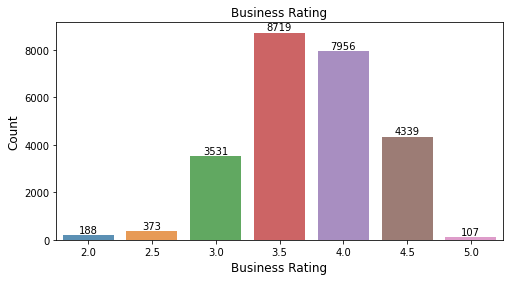

In [259]:
#Business Rating Graph
vertical_bar(restaurant['stars'], 'Business Rating', 'Business Rating', 'Count')

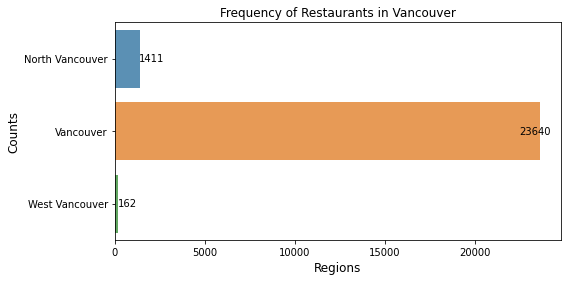

In [260]:
#Frequeny graph for different regions of Vancouver
horizontal_bar(restaurant['city'], 'Frequency of Restaurants in Vancouver', 'Regions', 'Counts')


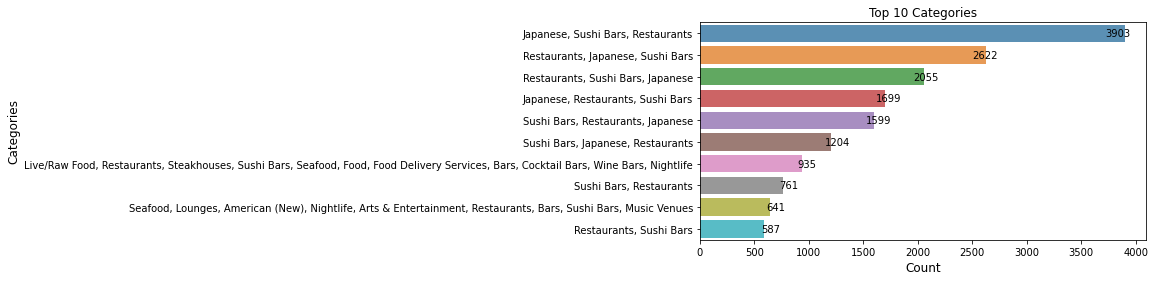

In [286]:
#Frequeny graph for Top 10 categories/cuisine
x=restaurant['categories'].value_counts()[:10]
#Plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.values, y=x.index, alpha=0.8, orient='h')
plt.title("Top 10 Categories")
plt.ylabel('Categories', fontsize=12)
plt.xlabel('Count', fontsize=12)

#Text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    width = rect.get_width()
    ax.text(width/1.05, rect.get_y() + rect.get_height()/2, label,
                 ha='left', va='center')

plt.show()

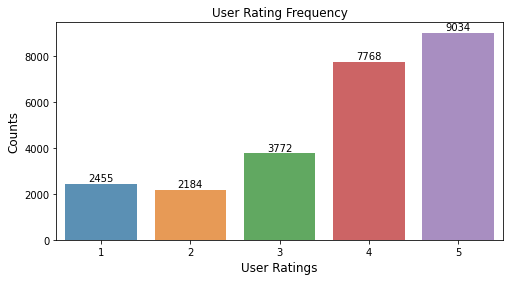

In [262]:
#User Ratings Graph
vertical_bar(restaurant['review_stars'], 'User Rating Frequency','User Ratings', 'Counts')

In [263]:
#Sentiment Analysis

import nltk
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Spongebob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Spongebob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [264]:
#Extracting positive and negative sentiments
#Extracting objective and subjective statements
df_sentiment = restaurant[['name', 'text']]
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [265]:
#Creating columns for Polarity and Subjectivity
df_sentiment.loc[:,'Polarity'] = df_sentiment['text'].apply(pol)
df_sentiment.loc[:,'Subjectivity'] = df_sentiment['text'].apply(sub)
df_sentiment.head()


,name,text,Polarity,Subjectivity
0,Sushi California,"Very affordable sushi joint, but I was disappo...",0.075000,0.548529
1,Sushi California,"Love the food here! Always fresh, large portio...",0.484821,0.569643
2,Sushi California,Good sushi. The sashimi was fresh and the kimc...,0.400000,0.550000
3,Sushi California,This place always have long lineup. \nThe Cons...,0.226319,0.487687
4,Sushi California,Place has a trendy atmosphere and food is okay...,0.485714,0.657143


In [266]:
#Creating column for Polarity type
df_sentiment['Sentiment_Type'] = ''
df_sentiment.loc[df_sentiment.Polarity > 0, 'Sentiment_Type'] = 'Positive'
df_sentiment.loc[df_sentiment.Polarity < 0, 'Sentiment_Type'] = 'Negative'
df_sentiment.loc[df_sentiment.Polarity == 0, 'Sentiment_Type'] = 'Neutral'

In [267]:
#Creating column for Subjectivity type
df_sentiment['Subjectivity_Type'] = ''
df_sentiment.loc[df_sentiment.Polarity >= 0.5, 'Subjectivity_Type'] = 'Subjective'
df_sentiment.loc[df_sentiment.Polarity < 0.5, 'Subjectivity_Type'] = 'Objective'
df_sentiment.head()

,name,text,Polarity,Subjectivity,Sentiment_Type,Subjectivity_Type
0,Sushi California,"Very affordable sushi joint, but I was disappo...",0.075000,0.548529,Positive,Objective
1,Sushi California,"Love the food here! Always fresh, large portio...",0.484821,0.569643,Positive,Objective
2,Sushi California,Good sushi. The sashimi was fresh and the kimc...,0.400000,0.550000,Positive,Objective
3,Sushi California,This place always have long lineup. \nThe Cons...,0.226319,0.487687,Positive,Objective
4,Sushi California,Place has a trendy atmosphere and food is okay...,0.485714,0.657143,Positive,Objective


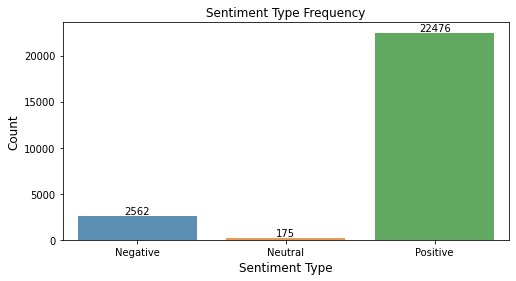

In [268]:
#Frequency graph of Polarity Type
vertical_bar(df_sentiment['Sentiment_Type'], 'Sentiment Type Frequency', 'Sentiment Type', 'Count')

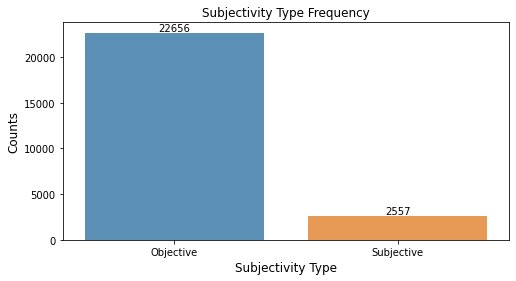

In [269]:
#Frequency graph of Subjectivity Type
vertical_bar(df_sentiment['Subjectivity_Type'], 'Subjectivity Type Frequency', 'Subjectivity Type', 'Counts')


In [270]:
#Creating Positive and Negative Corpus
Positive_Text = df_sentiment[df_sentiment['Sentiment_Type'] == 'Positive']
Negative_Text = df_sentiment[df_sentiment['Sentiment_Type'] == 'Negative']
Negative_Text.text.head()

7     My favorite sushi place in Vancouver. You shou...
15    Very mediocre sushi. The dishes I've tried all...
21    This place doesn't have the delicate flavour o...
24    This place has always been one of my favorite ...
29    encountered the worst service ever in this loc...
Name: text, dtype: object

In [280]:
#Combine dataframe text column
Positive_words = " ".join(Positive_Text.text)
Negative_words = " ".join(Negative_Text.text)

In [273]:
#Removing stop words Function

def remove_stop(x):
    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(x)
    #filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

    filtered_sentence = []

    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    print(filtered_sentence)

In [283]:
#Removing stop words for positive text
filtered_positive = remove_stop(Positive_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#Removing stop words for negative text
filtered_negative = remove_stop(Negative_words)

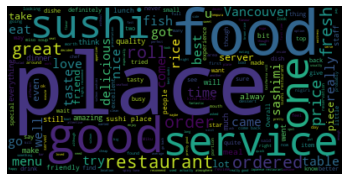

In [282]:
#Creating Wordcloud for Positive words
wordcloud_pos = WordCloud().generate(Positive_words)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

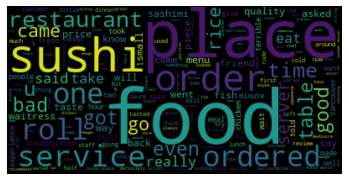

In [279]:
#Creating Wordcloud for Negative words
wordcloud_neg = WordCloud().generate(Negative_words)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()
